In [18]:
!pip install emnist

In [19]:
!pip install tensorflow_datasets


In [20]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Load EMNIST (Letters A–Z) from tensorflow_datasets
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

In [22]:
# Normalize and batch the data
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label - 1  # subtract 1 to get 0–25

batch_size = 128

ds_train = ds_train.map(normalize_img).batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(normalize_img).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(26, activation='softmax')  # 26 letters A-Z
])


In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(ds_train, epochs=10, validation_data=ds_test)


Epoch 1/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 78s 107ms/step - accuracy: 0.5645 - loss: 1.4565 - val_accuracy: 0.8700 - val_loss: 0.3987
Epoch 2/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 70s 101ms/step - accuracy: 0.8340 - loss: 0.5301 - val_accuracy: 0.8923 - val_loss: 0.3220
Epoch 3/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 80s 98ms/step - accuracy: 0.8641 - loss: 0.4241 - val_accuracy: 0.9045 - val_loss: 0.2862
Epoch 4/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.8788 - loss: 0.3762 - val_accuracy: 0.9101 - val_loss: 0.2702
Epoch 5/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 67s 96ms/step - accuracy: 0.8887 - loss: 0.3403 - val_accuracy: 0.9136 - val_loss: 0.2564
Epoch 6/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 82s 97ms/step - accuracy: 0.9006 - loss: 0.3083 - val_accuracy: 0.9153 - val_loss: 0.2565
Epoch 7/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 81s 95ms/step - accuracy: 0.9032 - loss: 0.2901 - val_accuracy: 0.9188 - val_loss: 0.2386
Epoch 8/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.9104 - loss: 0.2680 

In [25]:
loss, accuracy = model.evaluate(ds_test)
print(f"Test Accuracy: {accuracy:.4f}")

116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9209 - loss: 0.2381
Test Accuracy: 0.9207


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


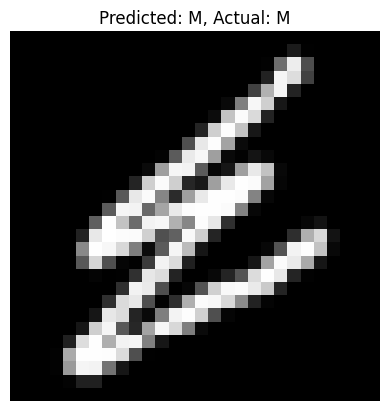

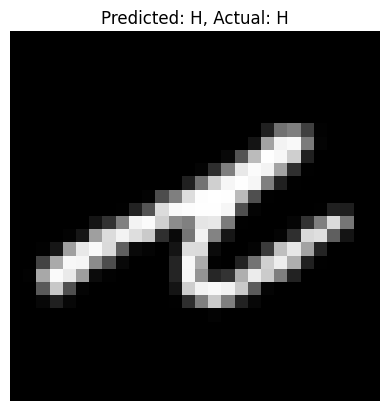

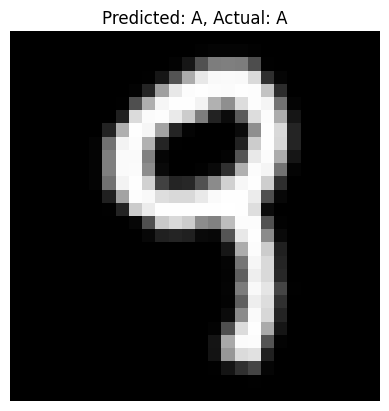

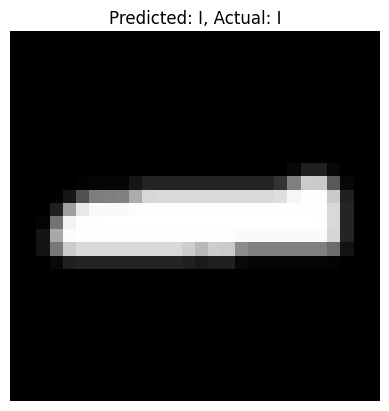

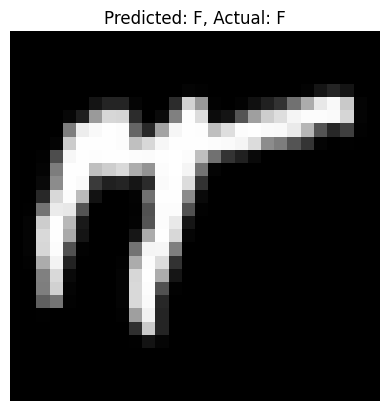

In [26]:
# Get a few examples from test dataset
for image, label in ds_test.take(1):
    pred = model.predict(image)
    for i in range(5):
        plt.imshow(image[i].numpy().reshape(28, 28), cmap='gray')
        predicted = np.argmax(pred[i])
        actual = label[i].numpy()
        plt.title(f"Predicted: {chr(predicted+65)}, Actual: {chr(actual+65)}")
        plt.axis('off')
        plt.show()
